In [57]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as image

In [46]:
url = 'https://raw.githubusercontent.com/'\
'allisonhorst/EDS_221_programming-essentials/'\
'main/activities/stl_blood_lead.csv'

stl_lead = pd.read_csv(url)

In [47]:
stl_lead.info()
stl_lead.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   geoID           106 non-null    int64  
 1   tractCE         106 non-null    int64  
 2   nameLSAD        106 non-null    object 
 3   countTested     106 non-null    int64  
 4   pctElevated     106 non-null    float64
 5   totalPop        106 non-null    int64  
 6   totalPop_MOE    106 non-null    int64  
 7   white           106 non-null    int64  
 8   white_MOE       106 non-null    int64  
 9   black           106 non-null    int64  
 10  black_MOE       106 non-null    int64  
 11  povertyTot      106 non-null    int64  
 12  povertyTot_MOE  106 non-null    int64  
 13  povertyU18      106 non-null    int64  
 14  povertyU18_MOE  106 non-null    int64  
dtypes: float64(1), int64(13), object(1)
memory usage: 12.5+ KB


,geoID,tractCE,countTested,pctElevated,totalPop,totalPop_MOE,white,white_MOE,black,black_MOE,povertyTot,povertyTot_MOE,povertyU18,povertyU18_MOE
count,1.060000e+02,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2.951011e+10,113385.915094,737.367925,10.163679,2998.584906,353.349057,1371.716981,201.377358,1429.867925,288.377358,786.943396,270.500000,249.754717,140.084906
std,8.132848e+03,8132.847911,414.180391,6.006316,1263.137227,140.297374,1293.399800,145.212649,1038.309754,148.843059,528.611313,156.111819,262.596152,107.482811
min,2.951010e+10,101100.000000,23.000000,0.000000,620.000000,94.000000,1.000000,4.000000,35.000000,38.000000,158.000000,65.000000,0.000000,3.000000
25%,2.951011e+10,106425.000000,411.000000,4.587500,2025.000000,249.500000,88.500000,60.500000,633.250000,183.250000,408.500000,160.250000,66.500000,61.250000
50%,2.951011e+10,112350.000000,694.000000,9.480000,2911.500000,333.500000,1290.000000,212.500000,1334.500000,269.000000,651.500000,241.500000,173.500000,120.500000
75%,2.951012e+10,119101.750000,923.250000,14.380000,3784.500000,439.500000,2168.250000,299.750000,2029.000000,379.250000,955.750000,337.500000,341.750000,194.750000
max,2.951013e+10,127600.000000,2116.000000,23.280000,7069.000000,832.000000,6128.000000,751.000000,4572.000000,760.000000,2801.000000,1049.000000,1320.000000,595.000000


In [48]:
def snakecase(s):
        """Convert CamelCase to snake_case and lowercase the string
        s: string
        """
        s = re.sub(
        # Find a lower case letter or number (group 1)
        # followed by an upper case letter (group 2):
        '([a-z0-9])([A-Z])',
        # Replace with - 
        # \1, the lower case letter, 
        # _, an underscore, and
        # \2, the upper case letter:
        r'\1_\2',
        # Perform the search and replace in 
        # the string s:
        s 
        )
        s = re.sub(
                ' ', # Find a space
                '_', # Replace with an underscore
                s    # In the string
                ).lower()  # Convert to lower case
        return s

In [49]:
stl_lead.columns = [
    snakecase(col) for col in stl_lead.columns
]

In [50]:
stl_lead.head()

,geo_id,tract_ce,name_lsad,count_tested,pct_elevated,total_pop,total_pop_moe,white,white_moe,black,black_moe,poverty_tot,poverty_tot_moe,poverty_u18,poverty_u18_moe
0,29510118100,118100,Census Tract 1181,345,9.57,1161,192,414,100,724,179,324,140,109,105
1,29510117400,117400,Census Tract 1174,871,12.06,4307,447,2604,303,1338,374,615,255,169,156
2,29510126700,126700,Census Tract 1267,458,18.12,1089,199,432,116,631,187,506,164,98,60
3,29510119102,119102,Census Tract 1191.02,182,2.20,3237,309,2008,262,646,210,958,234,15,25
4,29510126800,126800,Census Tract 1268,486,4.73,3490,231,3026,270,194,98,349,129,35,47


In [51]:
stl_lead['prop_white'] = stl_lead['white'] / stl_lead['total_pop']

In [52]:
print(stl_lead.columns)

Index(['geo_id', 'tract_ce', 'name_lsad', 'count_tested', 'pct_elevated',
       'total_pop', 'total_pop_moe', 'white', 'white_moe', 'black',
       'black_moe', 'poverty_tot', 'poverty_tot_moe', 'poverty_u18',
       'poverty_u18_moe', 'prop_white'],
      dtype='object')


<Axes: xlabel='prop_white', ylabel='pct_elevated'>

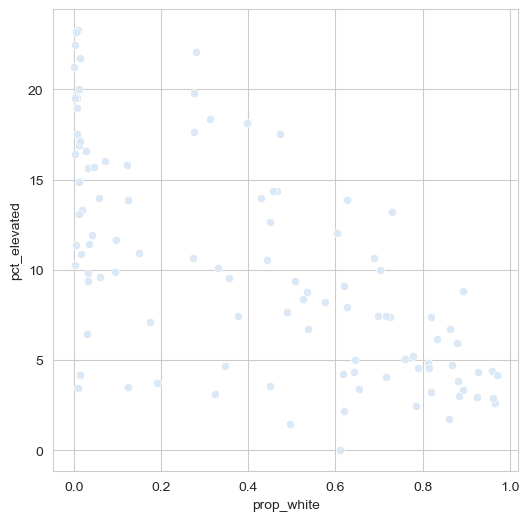

In [56]:
fig1 = plt.figure(figsize = (6,6))

sns.scatterplot(
    data=stl_lead,
    y = 'pct_elevated',
    x = 'prop_white'
)


In [66]:
im = image.imread("..\figs\IMG_9320.HEIC")

OSError: [Errno 22] Invalid argument: '..\x0cigs\\IMG_9320.HEIC'

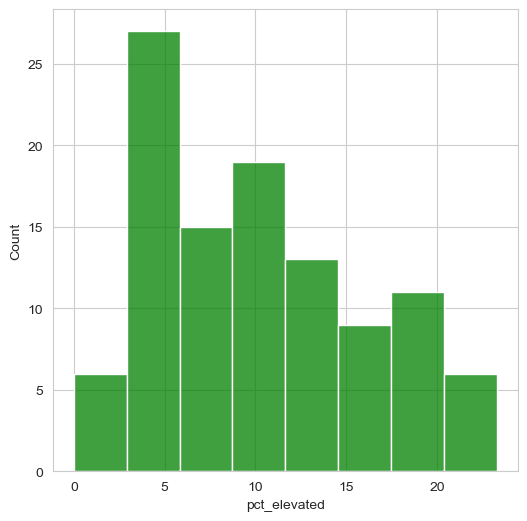

In [55]:

fig2 = plt.figure(figsize = (6,6))

sns.histplot(
    data=stl_lead,
    x = 'pct_elevated',
    color= 'green'
    
)
sns.set_style('whitegrid')
